## CV
with TFLite

In [1]:
!pip install ai_edge_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.6/477.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import ai_edge_torch
import torch

/usr/local/lib/python3.11/dist-packages/torch/distributed/distributed_c10d.py:354: UserWarning: Device capability of jax unspecified, assuming `cpu` and `cuda`. Please specify it via the `devices` argument of `register_backend`.
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import torchvision

In [ ]:
!pip install --upgrade tensorflow

In [4]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=e831fbcd1d96bb555c5050373f9ef4a7f1c6cd9b7c258048c5c84adbf39497d3
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from efficientnet_pytorch import EfficientNet


In [6]:
import kagglehub

path = kagglehub.dataset_download("nderalparslan/dwsonder")

print("Path to dataset files:", path)

100%|██████████| 2.35G/2.35G [02:02<00:00, 20.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1


In [7]:
import os
for dirname, _, filenames in os.walk(path):
    print(dirname)

/root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1
/root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1/images


In [8]:
training_dir = "/root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1/images"

Preprocessing for Tensorflow https://www.kaggle.com/code/amartinez111/window-or-door 

In [9]:
available_categories = {
    "0": "door", # dataset error
    "1": "door",
    "2": "window",
    "3": "stair",
}
df_file_to_category = pd.DataFrame(columns=["filename", "labels"])

for dirname, _, filenames in os.walk(training_dir):
    for file in filenames:
        if not file.endswith("txt"):
            continue

        df_path = os.path.join(training_dir, file)

        image_classification_list = []

        if not os.path.getsize(df_path) == 0:
            # if file is not empty, i get only class data
            df = pd.read_csv(df_path, sep=" ", header=None)
            df.columns = ["labels", "min_x", "min_y", "max_x", "max_y"]
            df["filename"] = df_path
            image_classification_list = df.loc[:,"labels"].tolist()

        # this this line i delete all of repeated numbers
        image_classification_list = [*set(image_classification_list)]

        categories = []
        for individual_classification in image_classification_list:
            categories.append(available_categories[str(individual_classification)])
        if ((len(categories) == 1) and (os.path.exists(os.path.join('/root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1/images', file)))):
            new_prediction = pd.Series(data={'filename': df_path.replace('txt', 'jpg'), 'labels': categories}, name='new_prediction')
            new_prediction_df = new_prediction.to_frame().T  # Transpose it to get the correct shape
            df_file_to_category = pd.concat([df_file_to_category, new_prediction_df], ignore_index=True)

df_filename = "image_category.csv"
df_file_to_category.to_csv(df_filename, mode="w")

In [10]:
df_file_to_category.info()
df_file_to_category.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4424 non-null   object
 1   labels    4424 non-null   object
dtypes: object(2)
memory usage: 69.3+ KB


filename    labels
3997  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
612   /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
2     /root/.cache/kagglehub/datasets/nderalparslan/...  [window]
3938  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
391   /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
3545  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
3742  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
3113  /root/.cache/kagglehub/datasets/nderalparslan/...  [window]
3453  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]
3901  /root/.cache/kagglehub/datasets/nderalparslan/...    [door]

In [11]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

category_to_index = {v: int(k) for k, v in available_categories.items()}

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, directory, transform=None):
        self.dataframe = dataframe
        self.directory = directory
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.dataframe.iloc[idx, 0])  # 'filename' column
        if not os.path.exists(img_name):
            img_name = "/root/.cache/kagglehub/datasets/nderalparslan/dwsonder/versions/1/images/IMG_20181004_171414.jpg"
        image = Image.open(img_name).convert("RGB")  # Load image in RGB mode
        label = self.dataframe.iloc[idx, 1]  # 'labels' column

        if self.transform:
            image = self.transform(image)

        label_string = label[0]  # since it's a list with one string
        label_index = category_to_index[label_string]  # convert string to index
        label_tensor = torch.tensor(label_index, dtype=torch.long)  # Convert to tensor

        return image, label_tensor

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset, validation_dataset = train_test_split(df_file_to_category, test_size=0.6)

train_dataset = CustomImageDataset(dataframe=train_dataset, directory="/kaggle/input/dwsonder/images", transform=transform)
validation_dataset = CustomImageDataset(dataframe=validation_dataset, directory="/kaggle/input/dwsonder/images", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 3
batch_size = 64
num_epochs = 8
learning_rate = 0.001
weight_decay = 1e-4

model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_batches = 0

    # Training
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    avg_train_loss = running_loss / total_batches

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    total_val_batches = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            total_val_batches += 1

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / total_val_batches
    val_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


torch.save(model.state_dict(), 'efficientnet_model.pth')

# Convert the model to TFLite format
sample_input = (torch.randn(1, 3, 224, 224).to(device),)
tflite_model = ai_edge_torch.convert(model.eval(), sample_input)

tflite_model.export('efficientnet_model.tflite')

Loaded pretrained weights for efficientnet-b0
Epoch [1/8], Train Loss: 0.4098, Val Accuracy: 82.30%
Epoch [2/8], Train Loss: 0.1660, Val Accuracy: 83.65%
Epoch [3/8], Train Loss: 0.1003, Val Accuracy: 84.82%
Epoch [4/8], Train Loss: 0.1003, Val Accuracy: 84.37%
Epoch [5/8], Train Loss: 0.1043, Val Accuracy: 86.67%
Epoch [6/8], Train Loss: 0.0908, Val Accuracy: 87.65%
Epoch [7/8], Train Loss: 0.1039, Val Accuracy: 87.27%
Epoch [8/8], Train Loss: 0.0902, Val Accuracy: 88.44%


In [ ]:
tflite_model.export('efficientnet_model.tflite')

In [20]:
from google.colab import files

files.download('efficientnet_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!pip install ai-edge-model-explorer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00


In [18]:
import model_explorer
model_explorer.visualize('efficientnet_model.tflite')

ℹ️ Please re-run the cell in each new session

Loading extensions...
Loaded 8 extensions:
 - TFLite adapter (Flatbuffer)
 - TFLite adapter (MLIR)
 - TF adapter (MLIR)
 - TF adapter (direct)
 - GraphDef adapter
 - Pytorch adapter (exported program)
 - MLIR adapter
 - JSON adapter


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

![img](data:image/png;base64,)

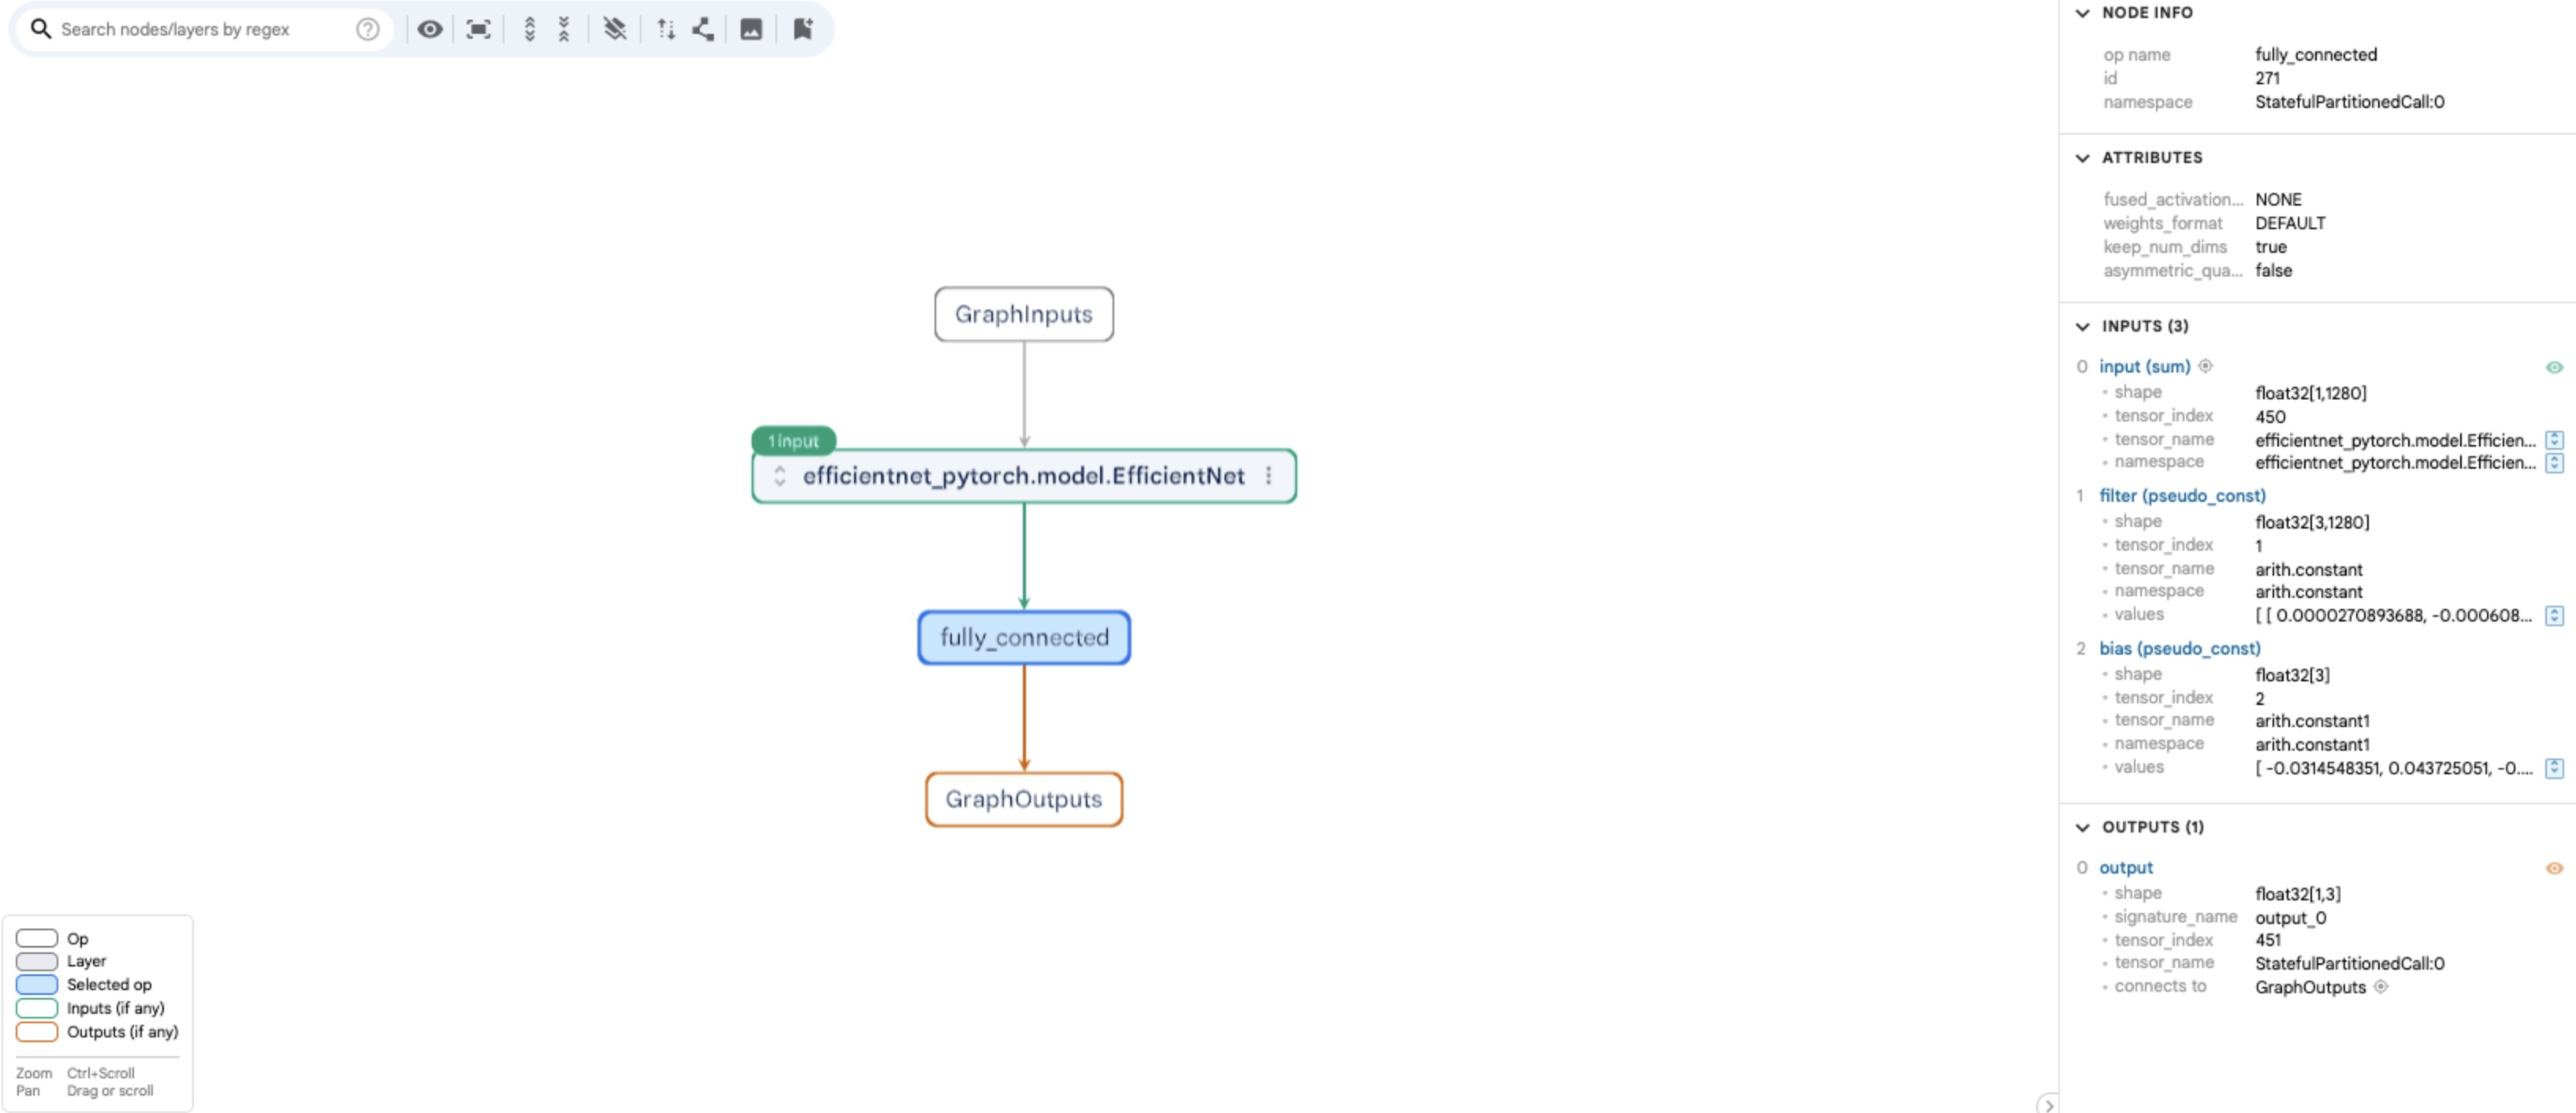